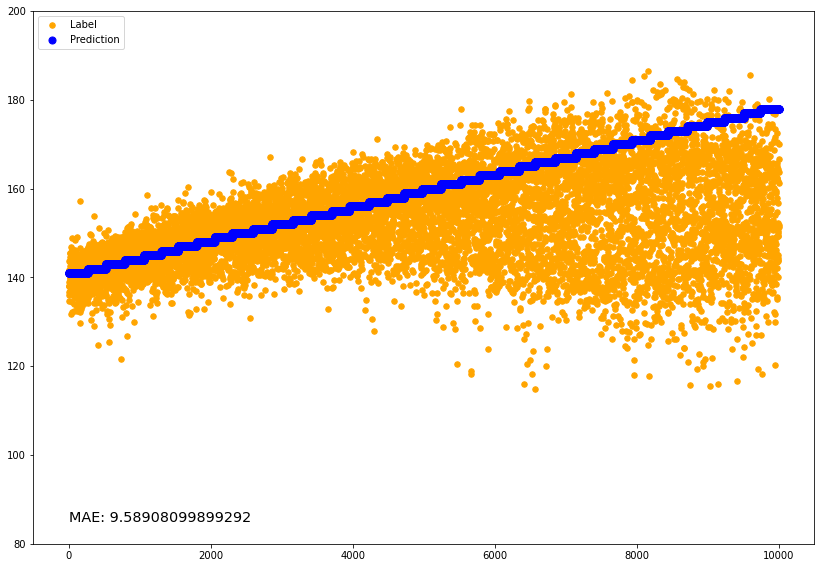

In [4]:
from dataset import *
from model import *
import matplotlib.pyplot as plt

criterion = nn.L1Loss()
criterion = criterion.cuda()

model = torch.load("./pth/cnn_9.4f.pth")

test_dataset = Dataset("../data/simu_10000_0.1_141_178_test.npy", 0, 1)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

step = 0
loss_test = 0
label = np.array([])
predict = np.array([])

with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        data, target = data.cuda(), target.cuda()
        output = model(data)
        # print(output)
        
        loss = criterion(output, target)
        
        label = np.append(label, target.cpu().detach().numpy().reshape((-1)))
        predict = np.append(predict,output.cpu().detach().numpy().reshape((-1)))
        # print(predict)

        loss_test = loss_test + loss.item()
        step = step + 1

loss_mean = loss_test / step

sorted_index = sorted(range(len(label)), key=lambda k: label[k])

sorted_label = [label[i] for i in sorted_index]
sorted_predict = [predict[i] for i in sorted_index]

MAEstr = "MAE: " + repr(loss_mean)

plt.figure(figsize=(14,9.8))
plt.scatter(np.arange(1,len(predict)+1),sorted_predict,c="orange", s=30)
plt.scatter(np.arange(1,len(label)+1),sorted_label, c="blue", s=50)
plt.legend(["Label" ,"Prediction"],loc="upper left")
plt.text(0.1,85,MAEstr,fontsize="x-large")
plt.ylim(80,200)
plt.show()